<a href="https://colab.research.google.com/github/harshvardhan176/ML_LAB_01/blob/main/ML_LAB_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# A1: Linear Regression with one attribute (feature='pt') to predict target ('MET')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from typing import Tuple

def train_lr_single_feature(
    df: pd.DataFrame,
    feature: str = "pt",
    target: str = "MET",
    test_size: float = 0.2,
    random_state: int = 42
) -> Tuple[LinearRegression, pd.DataFrame, pd.Series, pd.Series, pd.Series]:
    """
    Trains a LinearRegression model using a single feature.
    Returns: (model, X_train, y_train_pred, X_test, y_test_pred)
    Note: No prints here as per lab instructions.
    """
    X = df[[feature]]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    model = LinearRegression().fit(X_train, y_train)
    y_train_pred = pd.Series(model.predict(X_train), index=y_train.index, name="y_train_pred")
    y_test_pred  = pd.Series(model.predict(X_test),  index=y_test.index,  name="y_test_pred")

    return model, X_train, y_train_pred, X_test, y_test_pred

if __name__ == "__main__":
    # Update this path if your CSV is elsewhere
    DATA_PATH = "Wmunu.csv"

    df = pd.read_csv(DATA_PATH)

    model, X_train, y_train_pred, X_test, y_test_pred = train_lr_single_feature(
        df, feature="pt", target="MET", test_size=0.2, random_state=42
    )

    print("A1: Linear Regression with one attribute (pt -> MET)")
    print(f"Coefficient (slope) for 'pt': {model.coef_[0]:.6f}")
    print(f"Intercept: {model.intercept_:.6f}")
    print("\nSample training predictions (first 5):")
    print(y_train_pred.head())
    print("\nSample test predictions (first 5):")
    print(y_test_pred.head())


A1: Linear Regression with one attribute (pt -> MET)
Coefficient (slope) for 'pt': 0.000466
Intercept: 26.742778

Sample training predictions (first 5):
75220    26.758514
48955    26.762782
44966    26.754749
13568    26.757155
92727    26.761378
Name: y_train_pred, dtype: float64

Sample test predictions (first 5):
75721    26.755782
80184    26.755746
19864    26.757682
76699    26.756773
92991    26.758621
Name: y_test_pred, dtype: float64


In [ ]:
# A2: Calculate MSE, RMSE, MAPE, and R² for train and test predictions

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from typing import Tuple, Dict

def train_lr_single_feature(
    df: pd.DataFrame,
    feature: str = "pt",
    target: str = "MET",
    test_size: float = 0.2,
    random_state: int = 42
) -> Tuple[LinearRegression, pd.DataFrame, pd.Series, pd.DataFrame, pd.Series, pd.Series]:
    """Train Linear Regression using a single feature."""
    X = df[[feature]]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    model = LinearRegression().fit(X_train, y_train)
    y_train_pred = pd.Series(model.predict(X_train), index=y_train.index)
    y_test_pred  = pd.Series(model.predict(X_test), index=y_test.index)

    return model, X_train, y_train, y_train_pred, X_test, y_test, y_test_pred


def calculate_metrics(y_true: pd.Series, y_pred: pd.Series) -> Dict[str, float]:
    """Calculate regression metrics."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "R2": r2
    }

if __name__ == "__main__":
    DATA_PATH = "Wmunu.csv"
    df = pd.read_csv(DATA_PATH)

    model, X_train, y_train, y_train_pred, X_test, y_test, y_test_pred = train_lr_single_feature(
        df, feature="pt", target="MET"
    )

    # Metrics for Train & Test
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics  = calculate_metrics(y_test, y_test_pred)

    print("A2: Metrics for Linear Regression (pt -> MET)")
    print("\nTrain Set Metrics:")
    for k, v in train_metrics.items():
        print(f"{k}: {v:.6f}")

    print("\nTest Set Metrics:")
    for k, v in test_metrics.items():
        print(f"{k}: {v:.6f}")


A2: Metrics for Linear Regression (pt -> MET)

Train Set Metrics:
MSE: 270.743333
RMSE: 16.454280
MAPE: 1.096745
R2: 0.000043

Test Set Metrics:
MSE: 285.105737
RMSE: 16.885074
MAPE: 1.004282
R2: -0.000737


In [ ]:
# A3: Linear Regression with multiple features (use ALL features except target 'MET')

import pandas as pd
import numpy as np
from typing import Tuple, Dict, List
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

def prepare_xy(
    df: pd.DataFrame,
    target: str = "MET",
    features: List[str] | None = None
) -> Tuple[pd.DataFrame, pd.Series]:
    """
    Prepare X (features) and y (target).
    If 'features' is None, use ALL columns except the target.
    """
    if features is None:
        features = [c for c in df.columns if c != target]
    X = df[features]
    y = df[target]
    return X, y


def train_lr_multi_feature(
    X: pd.DataFrame,
    y: pd.Series,
    test_size: float = 0.2,
    random_state: int = 42
) -> Tuple[LinearRegression, pd.DataFrame, pd.Series, pd.Series, pd.DataFrame, pd.Series, pd.Series]:
    """
    Train a LinearRegression model using multiple features.
    Returns: (model, X_train, y_train, y_train_pred, X_test, y_test, y_test_pred)
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    model = LinearRegression().fit(X_train, y_train)
    y_train_pred = pd.Series(model.predict(X_train), index=y_train.index, name="y_train_pred")
    y_test_pred  = pd.Series(model.predict(X_test),  index=y_test.index,  name="y_test_pred")
    return model, X_train, y_train, y_train_pred, X_test, y_test, y_test_pred


def calculate_metrics(y_true: pd.Series, y_pred: pd.Series) -> Dict[str, float]:
    """Compute MSE, RMSE, MAPE, and R^2."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAPE": mape, "R2": r2}

if __name__ == "__main__":
    DATA_PATH = "Wmunu.csv"
    TARGET = "MET"

    df = pd.read_csv(DATA_PATH)

    # Use ALL features except target
    X, y = prepare_xy(df, target=TARGET, features=None)

    model, X_train, y_train, y_train_pred, X_test, y_test, y_test_pred = train_lr_multi_feature(
        X, y, test_size=0.2, random_state=42
    )

    # Metrics
    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics  = calculate_metrics(y_test, y_test_pred)

    print("A3: Linear Regression with ALL features (except target) -> Predicting MET")
    print("\nTrain Set Metrics:")
    for k, v in train_metrics.items():
        print(f"{k}: {v:.6f}")

    print("\nTest Set Metrics:")
    for k, v in test_metrics.items():
        print(f"{k}: {v:.6f}")

    print("\nModel Coefficients:")
    for name, coef in zip(X.columns, model.coef_):
        print(f"{name}: {coef:.6f}")
    print(f"Intercept: {model.intercept_:.6f}")


A3: Linear Regression with ALL features (except target) -> Predicting MET

Train Set Metrics:
MSE: 267.877450
RMSE: 16.366962
MAPE: 1.084196
R2: 0.010628

Test Set Metrics:
MSE: 281.514354
RMSE: 16.778390
MAPE: 0.994096
R2: 0.011869

Model Coefficients:
Run: 0.000297
Event: -0.000000
pt: 0.000556
eta: -0.085365
phi: 0.165352
Q: 0.615264
chiSq: -0.010836
dxy: 0.012447
iso: -0.010090
phiMET: -0.084295
Intercept: -22.946603


In [ ]:
# A4: K-Means clustering on all features EXCEPT the target 'MET'

import pandas as pd
import numpy as np
from typing import Tuple, Optional
from sklearn.cluster import KMeans

def prepare_features_for_clustering(
    df: pd.DataFrame,
    target: str = "MET"
) -> pd.DataFrame:
    """
    Return a feature matrix X for clustering by dropping the target column.
    Assumes remaining columns are numeric (as in Wmunu.csv).
    """
    if target not in df.columns:
        raise ValueError(f"Target column '{target}' not found in DataFrame.")
    X = df.drop(columns=[target])

    return X


def run_kmeans(
    X: pd.DataFrame,
    n_clusters: int = 2,
    random_state: int = 0,
    n_init: Optional[int | str] = "auto"
) -> Tuple[KMeans, pd.Series, np.ndarray, float]:
    """
    Fit KMeans on X and return:
    - model
    - labels (as a pd.Series aligned with X.index)
    - cluster_centers_ (np.ndarray)
    - inertia_ (float)
    """

    try:
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=n_init).fit(X)
    except TypeError:

        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10).fit(X)

    labels = pd.Series(kmeans.labels_, index=X.index, name="cluster")
    centers = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    return kmeans, labels, centers, inertia

if __name__ == "__main__":
    DATA_PATH = "Wmunu.csv"
    TARGET = "MET"
    N_CLUSTERS = 2
    RANDOM_STATE = 0

    df = pd.read_csv(DATA_PATH)


    X_cluster = prepare_features_for_clustering(df, target=TARGET)

    model, labels, centers, inertia = run_kmeans(
        X_cluster,
        n_clusters=N_CLUSTERS,
        random_state=RANDOM_STATE,
        n_init="auto"
    )

    print(f"A4: K-Means Clustering (k={N_CLUSTERS}) on features (excluding '{TARGET}')")
    print("\nCluster counts:")
    print(labels.value_counts().sort_index())

    print(f"\nInertia: {inertia:.4f}")


    centers_df = pd.DataFrame(centers, columns=X_cluster.columns)
    print("\nCluster centers (rows = clusters, cols = features):")
    print(centers_df)

    df_with_clusters = df.copy()
    df_with_clusters["cluster"] = labels
    print("\nSample of data with assigned cluster labels:")
    print(df_with_clusters.head())


A4: K-Means Clustering (k=2) on features (excluding 'MET')

Cluster counts:
cluster
0    21878
1    78122
Name: count, dtype: int64

Inertia: 6834053368734507073536.0000

Cluster centers (rows = clusters, cols = features):
             Run         Event         pt       eta       phi         Q  \
0  172501.327955  1.331535e+09  38.466193 -0.002127  0.018316  0.109059   
1  167930.426077  2.529225e+08  38.943842  0.000749  0.000542  0.091498   

      chiSq       dxy        iso    phiMET  
0  7.395205 -0.044371  16.344751 -0.136433  
1  7.128799 -0.010971  16.905462 -0.112885  

Sample of data with assigned cluster labels:
      Run      Event       pt     eta     phi  Q     chiSq     dxy      iso  \
0  173389  489963747  29.3153 -0.1393  1.3561  1    0.8456 -0.0600   0.0000   
1  173389  490024840  44.1461 -1.3590 -0.5390  1    1.2943 -0.0126  26.3423   
2  173389  490102189  42.7895 -1.0193  2.3390 -1    0.8078 -0.0840   2.9748   
3  173389  490092121  31.2215 -0.1270 -0.4889 -1  109.

In [ ]:
# A5: K-Means Clustering Validation Metrics

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

df = pd.read_csv("Wmunu.csv")


feature_cols = ['pt', 'eta', 'phi', 'Q', 'chiSq', 'dxy', 'MET', 'phiMET']
X = df[feature_cols].copy()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)


sil = silhouette_score(X_scaled, labels, sample_size=min(5000, X_scaled.shape[0]), random_state=42)
ch  = calinski_harabasz_score(X_scaled, labels)
dbi = davies_bouldin_score(X_scaled, labels)

print("Clustering Metrics (k=2):")
print(f"Silhouette Score: {sil:.4f}")
print(f"Calinski–Harabasz Score: {ch:.4f}")
print(f"Davies–Bouldin Index: {dbi:.4f}")


cluster_counts = pd.Series(labels).value_counts().sort_index()
print("\nCluster Distribution:")
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} points")


Clustering Metrics (k=2):
Silhouette Score: 0.2090
Calinski–Harabasz Score: 14312.6541
Davies–Bouldin Index: 1.9818

Cluster Distribution:
Cluster 0: 54766 points
Cluster 1: 45234 points


    k  Silhouette            CH        DB
0   2    0.177192  12689.845109  2.134461
1   3    0.183753  10641.473619  1.860803
2   4    0.181345   9456.756465  1.910446
3   5    0.178813   8215.213317  1.885849
4   6    0.189636   8053.934329  1.708156
5   7    0.186064   7503.634587  1.549248
6   8    0.167423   6803.257630  1.690950
7   9    0.181295   6563.988456  1.584951
8  10    0.187007   6387.466504  1.525405


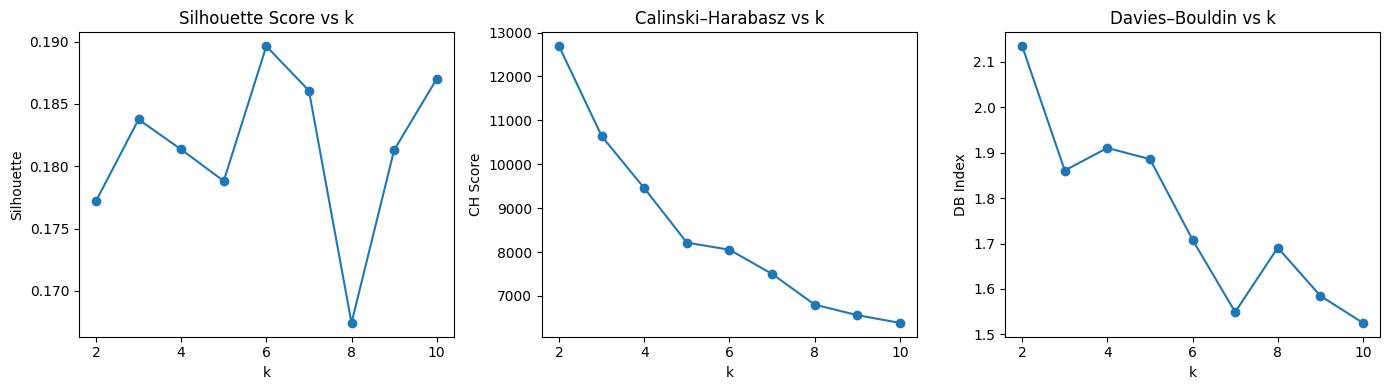

In [ ]:
# A6: K-Means Clustering with Different k values
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt


df = pd.read_csv("Wmunu.csv")


feature_cols = ['pt', 'eta', 'phi', 'Q', 'chiSq', 'dxy', 'MET', 'phiMET']
X = df[feature_cols].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

metrics = {"k": [], "Silhouette": [], "CH": [], "DB": []}

for k in range(2, 11):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=2048, n_init=5)
    labels = kmeans.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, labels, sample_size=min(2000, X_scaled.shape[0]), random_state=42)
    ch  = calinski_harabasz_score(X_scaled, labels)
    dbi = davies_bouldin_score(X_scaled, labels)

    metrics["k"].append(k)
    metrics["Silhouette"].append(sil)
    metrics["CH"].append(ch)
    metrics["DB"].append(dbi)

df_metrics = pd.DataFrame(metrics)
print(df_metrics)

plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.plot(df_metrics["k"], df_metrics["Silhouette"], marker='o')
plt.title("Silhouette Score vs k")
plt.xlabel("k"); plt.ylabel("Silhouette")

plt.subplot(1,3,2)
plt.plot(df_metrics["k"], df_metrics["CH"], marker='o')
plt.title("Calinski–Harabasz vs k")
plt.xlabel("k"); plt.ylabel("CH Score")

plt.subplot(1,3,3)
plt.plot(df_metrics["k"], df_metrics["DB"], marker='o')
plt.title("Davies–Bouldin vs k")
plt.xlabel("k"); plt.ylabel("DB Index")

plt.tight_layout()
plt.show()

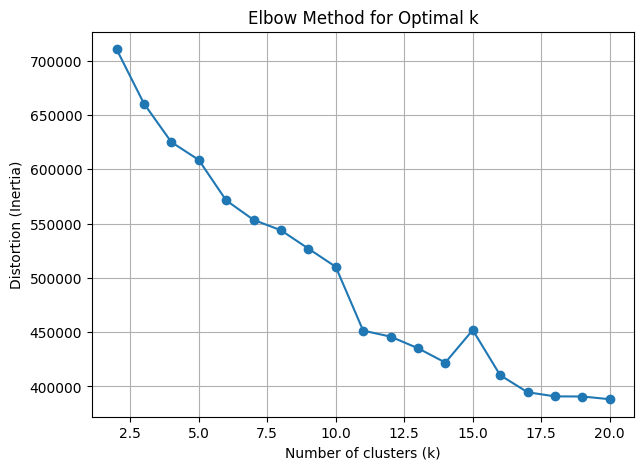

In [ ]:
# A7: Elbow Method for Optimal k
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

df = pd.read_csv("Wmunu.csv")

feature_cols = ['pt', 'eta', 'phi', 'Q', 'chiSq', 'dxy', 'MET', 'phiMET']
X = df[feature_cols].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

distortions = []
k_values = range(2, 21)

for k in k_values:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=2048, n_init=5)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(k_values, distortions, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Distortion (Inertia)")
plt.grid(True)
plt.show()
